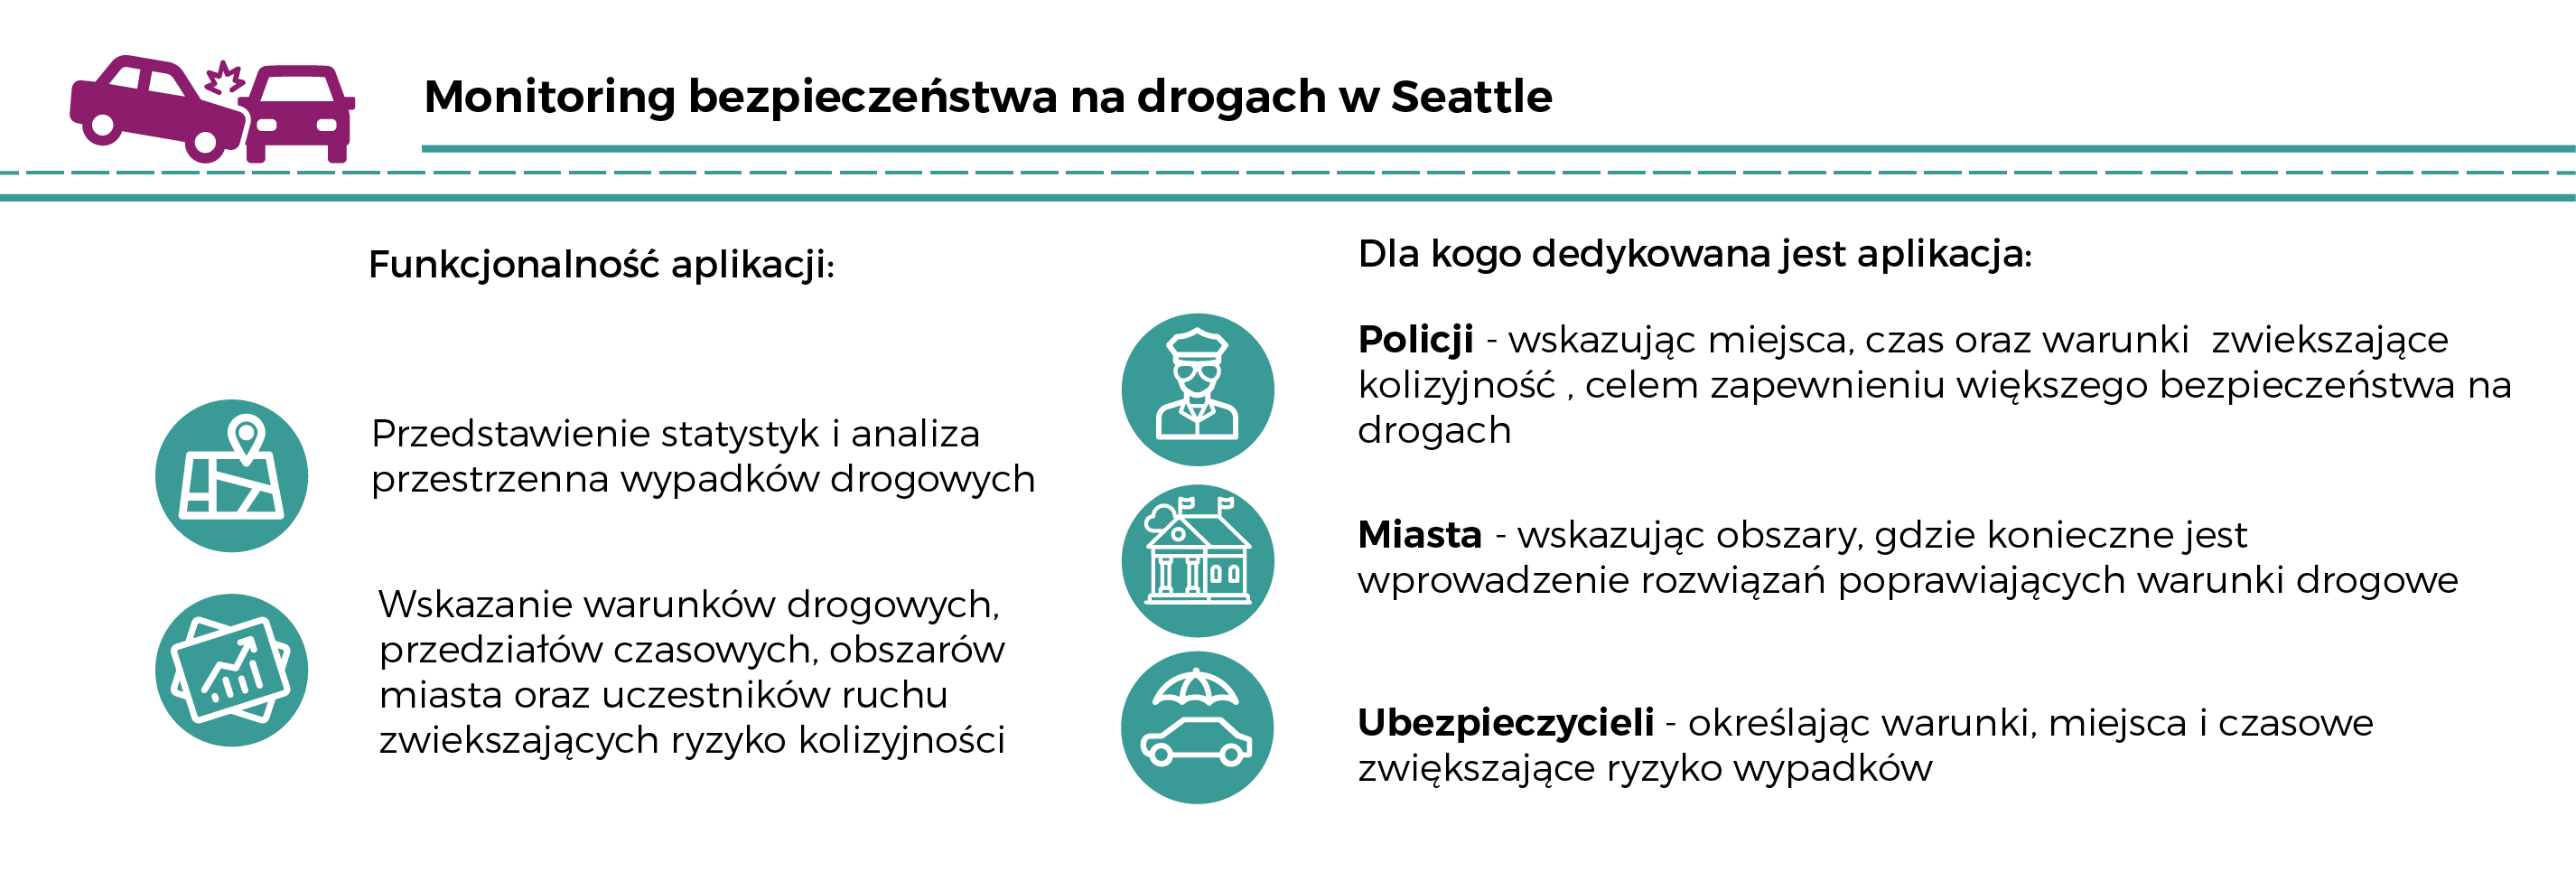

In [ ]:
from functions import Dataset, import_data, widgety, clicked, wybierz_zmienne, prognozy

from wykresy import ranni_na_miesiac, wypadki_na_dzien, ranni_uczestnik_ruchu, co_wplywa_na_kolizje, warunki_pogodowe, warunki_drogowe, kolizje_miesiac, kolizje_rok_dzien, kolizje_doba # Maciek, musisz poprawic te wykresy zeby szly z tej samej bazy
from symulacje import srednia_miesiac, testSrednich_bootstrap, prawdopodobienstwo
from testy import dwie_srednie
from analizy_przestrzenne import mapa_klastry, gdzie_powazne_wypadki, rozklad_wypadkow, mapa_dzielnic

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import bokeh
from bokeh.palettes import Spectral3
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer

#importy dla map:
import folium # bokeh wywoluje konflikt z ta biblioteka
import geopandas as gpd #uwaga ta biblioteka musi byc zainstalowana na nowym srodowisku i to jako pierwsza, potem kolejne instaluja sie juz spoko

import plotly.express as px
from folium import plugins

## <span style="color:#3A9B96">Uporządkowanie i zaznajomienie z bazą danych</span>

In [ ]:
print(Dataset())

### Pobranie danych, utworzenie bazy danych kolizji (df) i zmiennych

In [ ]:
df = import_data(Dataset.kolizje)
df_box, lata, wybor, wskaznik, cecha, button = widgety(df)

In [ ]:
df_prognozy = prognozy(df) #poprawiłam :)

### INTERAKTYWNY WYKRES SKRZYNKOWY DO EKSPLORACJI DANYCH
Możesz wykluczyć z danych obserwacje odstające i zawęzić zakres lat. Sam wykres wyrysowuje się na podstawie wybraych parametrów.

In [ ]:
button.on_click(clicked)
wybierz_zmienne(lata, wybor, wskaznik, cecha, button)

## <span style="color:#3A9B96">Podstawowe statystyki dotyczące wypadków w Seattle</span>

### Liczba rannych (według typu uczestnika ruchu drogowego) w poszczególnych miesiącach

In [ ]:
ranni_uczestnik_ruchu (df)

### Wykres liczby kolizji na miesiąc

In [ ]:
kolizje_miesiac(df_prognozy)

### Liczba rannych (według typu uczestnika ruchu drogowego) w poszczególnych miesiącach

In [ ]:
ranni_na_miesiac (df)

### Diagram kolizji w danym roku i dniu tygodnia

In [ ]:
kolizje_rok_dzien(df_prognozy)

### Wykres kolizji w ciągu doby

In [ ]:
kolizje_doba(df_prognozy)

### Liczba rannych (według typu uczestnika ruchu drogowego) o poszczególnych godzinach

In [ ]:
wypadki_na_dzien (df)

## <span style="color:#3A9B96">Uwarunkowania wpływające na wypadki na drogach w Seattle</span>

### Czynniki ludzkie wpływające na zwiększenie kolizyjności

In [ ]:
co_wplywa_na_kolizje (df)

### Czynniki pogodowe i ich wpływ na liczbę wypadków

In [ ]:
warunki_pogodowe (df)

### Warunnki drogowe wpływające na liczbę wypadków

In [ ]:
warunki_drogowe (df)

## <span style="color:#3A9B96">Analizy przestrzenne</span>

### Rozkład przestrzenny wypadków na próbie 2000

In [ ]:
mapa_klastry (df)

### Rozkład przestrzenny lokalizacji najpoważniejszych wypadków

In [ ]:
gdzie_powazne_wypadki (df)

### Rozkład przestrzenny wypadków w zależności od pory dnia

In [ ]:
rozklad_wypadkow (df)

### Rozkład przestrzenny wypadków według dzielnic

In [ ]:
mapa_dzielnic (df)

## <span style="color:#8c1c6c">Testy statystyczne i symulacje</span>

### Test średnich

In [ ]:
dwie_srednie(dane=df, cecha='ROK', grupa1 = 2007, grupa2 = 2017, wartosc='SMIERTELNIE_RANNI', alpha=0.01, obszar='lewy')

### Porównanie średnich ilości kolizji w danych miesiącach.
### Wykorzystanie symulacji Monte Carlo do zwiększenia wiarygodności testu statystycznego.

In [ ]:
srednia_miesiac(df_prognozy)

In [ ]:
testSrednich_bootstrap(df_prognozy, nr_miesiacaA = 6, nr_miesiacaB = 7, n=1000, alpha=0.05)

### Prawdopodobieństwo kolizji w danym miesjcu Seattle

In [ ]:
lista = widgets.Dropdown(
    options=[((47.635942953663616, -122.3141684559052), 2.00), ((47.62717616648498, -122.35211871192145), 1.75), ((47.71717310092632, -122.34489607877191), 1.13)],
    value=2,
    description='Miejsce:')
display(lista)

In [ ]:
prawdopodobienstwo(k=0, mu=lista.value)